## 출처

### 서울특별시 의료기관 구별 합계

- 서울시 의료기관 (구별) 통계
https://data.seoul.go.kr/dataList/173/S/2/datasetView.do

In [51]:
# 관련 모듈 import 하기
import pandas as pd
import numpy as np

In [52]:
import matplotlib.pyplot as plt #그래프 패키지 모듈 등록
%matplotlib inline 
#그래프는 show()함수를 통해서 독립창에서 실행되는 것이 원칙
#그래프를 콘솔에서 바로 작동되록 하는 설정

In [53]:
# 콘솔에서 모든 출력 허용하기
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

### read_csv 하는데 필요한 파일 목록
- ./data/서울시 의료기관 (구별) 통계.txt

In [54]:
raw_data_1 = pd.read_csv("./data/서울시 의료기관 (구별) 통계.txt", sep='\t', thousands = ',') # thousands -> 질문! (안된다!)
raw_data_1.head() # 5개씩 확인 (상단)

,기간,자치구,계,계.1,종합병원,종합병원.1,병원,병원.1,의원,의원.1,...,치과병원,치과병원.1,치과의원,치과의원.1,한방병원,한방병원.1,한방의원,한방의원.1,조산원,조산원.1
0,기간,자치구,병원수,병상수,병원수,병상수,병원수,병상수,병원수,병상수,...,병원수,병상수,병원수,병상수,병원수,병상수,병원수,병상수,병원수,병상수
1,2017,서울시,"17,142","86,800",57,"33,077",214,"17,740","8,176","11,042",...,64,96,"4,786",69,43,"2,657","3,626",728,3,12
2,2017,종로구,500,"3,387",4,"2,978",2,153,182,185,...,1,40,168,-,1,31,135,-,-,-
3,2017,중구,543,"1,533",3,"1,035",3,261,220,184,...,5,-,208,-,1,53,89,-,-,-
4,2017,용산구,298,992,1,727,2,174,123,86,...,-,-,108,-,-,-,60,-,1,5


In [55]:
raw_data = raw_data_1[['기간','자치구','계','종합병원','병원','의원',
                       '부속병의원','요양병원','노인전문병원','결핵병원','정신병원',
                       '치과병원','치과의원','한방병원','한방의원','조산원']]

hospital= raw_data.iloc[1:len(raw_data)+1]
hospital.head()

,기간,자치구,계,종합병원,병원,의원,부속병의원,요양병원,노인전문병원,결핵병원,정신병원,치과병원,치과의원,한방병원,한방의원,조산원
1,2017,서울시,"17,142",57,214,"8,176",51,108,6,1,7,64,"4,786",43,"3,626",3
2,2017,종로구,500,4,2,182,7,-,-,-,-,1,168,1,135,-
3,2017,중구,543,3,3,220,14,-,-,-,-,5,208,1,89,-
4,2017,용산구,298,1,2,123,3,-,-,-,-,-,108,-,60,1
5,2017,성동구,432,1,7,197,-,3,-,-,-,1,131,-,92,-


In [56]:
# 데이터 파악!
hospital.info() # 총 79개의 행 / 14개의 열

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 1 to 104
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기간      104 non-null    object
 1   자치구     104 non-null    object
 2   계       104 non-null    object
 3   종합병원    104 non-null    object
 4   병원      104 non-null    object
 5   의원      104 non-null    object
 6   부속병의원   104 non-null    object
 7   요양병원    104 non-null    object
 8   노인전문병원  104 non-null    object
 9   결핵병원    104 non-null    object
 10  정신병원    104 non-null    object
 11  치과병원    104 non-null    object
 12  치과의원    104 non-null    object
 13  한방병원    104 non-null    object
 14  한방의원    104 non-null    object
 15  조산원     104 non-null    object
dtypes: object(16)
memory usage: 13.1+ KB


In [57]:
hospital.describe()

,기간,자치구,계,종합병원,병원,의원,부속병의원,요양병원,노인전문병원,결핵병원,정신병원,치과병원,치과의원,한방병원,한방의원,조산원
count,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104
unique,4,26,95,10,22,90,16,17,5,2,4,13,77,15,67,3
top,2017,금천구,717,1,5,259,-,3,-,-,-,1,103,1,93,-
freq,26,4,3,32,16,3,48,22,83,96,92,33,3,27,4,88


In [58]:
# 기간이 2017년인 행을 추출할 index를 만든다
_2017 = (hospital['기간'] == '2017')

# 조건를 충족하는 데이터를 필터링하여 새로운 변수에 저장합니다.
hospital_2017 = hospital[_2017][1:]

# 자치구를 기준 index으로 정한다!
hospital_2017.set_index('자치구', inplace=True) # inplace=True -> 원본 반영

# '-' -> '0'으로
hospital_2017.replace('-','0',inplace=True) # inplace=True -> 원본 반영

# 결과를 출력합니다.
hospital_2017.head()

,기간,계,종합병원,병원,의원,부속병의원,요양병원,노인전문병원,결핵병원,정신병원,치과병원,치과의원,한방병원,한방의원,조산원
자치구,,,,,,,,,,,,,,,
종로구,2017,500,4,2,182,7,0,0,0,0,1,168,1,135,0
중구,2017,543,3,3,220,14,0,0,0,0,5,208,1,89,0
용산구,2017,298,1,2,123,3,0,0,0,0,0,108,0,60,1
성동구,2017,432,1,7,197,0,3,0,0,0,1,131,0,92,0
광진구,2017,543,2,3,261,0,2,0,0,1,2,151,0,121,0


In [59]:
# 기간이 2018년인 행을 추출할 index를 만든다
_2018 = (hospital['기간'] == '2018')

# 조건를 충족하는 데이터를 필터링하여 새로운 변수에 저장합니다.
hospital_2018 = hospital[_2018][1:]

# 자치구를 기준 index으로 정한다!
hospital_2018.set_index('자치구', inplace=True)

# '-' -> '0'으로
hospital_2018.replace('-','0',inplace=True)

# 결과를 출력합니다.
hospital_2018.head()

,기간,계,종합병원,병원,의원,부속병의원,요양병원,노인전문병원,결핵병원,정신병원,치과병원,치과의원,한방병원,한방의원,조산원
자치구,,,,,,,,,,,,,,,
종로구,2018,496,4,2,186,7,0,0,0,0,1,163,0,133,0
중구,2018,558,3,3,232,12,0,0,0,0,6,208,1,93,0
용산구,2018,304,1,2,128,2,0,0,0,0,0,108,0,62,1
성동구,2018,432,1,5,197,0,3,0,0,0,1,131,0,94,0
광진구,2018,553,2,5,269,0,2,0,0,0,2,152,0,121,0


In [60]:
# 기간이 2019년인 행을 추출할 index를 만든다
_2019 = (hospital['기간'] == '2019')

# 조건를 충족하는 데이터를 필터링하여 새로운 변수에 저장합니다.
hospital_2019 = hospital[_2019][1:]

# 자치구를 기준 index으로 정한다!
hospital_2019.set_index('자치구', inplace=True)

# '-' -> '0'으로
hospital_2019.replace('-','0',inplace=True) 

# 결과를 출력합니다.
hospital_2019.head()

,기간,계,종합병원,병원,의원,부속병의원,요양병원,노인전문병원,결핵병원,정신병원,치과병원,치과의원,한방병원,한방의원,조산원
자치구,,,,,,,,,,,,,,,
종로구,2019,494,4,2,189,7,0,0,0,0,1,161,0,130,0
중구,2019,560,2,4,233,13,0,0,0,0,6,207,1,94,0
용산구,2019,307,1,2,133,2,0,0,0,0,0,106,0,62,1
성동구,2019,444,1,6,213,0,3,0,0,0,1,127,0,93,0
광진구,2019,552,2,5,268,0,3,0,0,0,2,154,0,118,0


In [61]:
# 기간이 2020년인 행을 추출할 index를 만든다
_2020 = (hospital['기간'] == '2020')

# 조건를 충족하는 데이터를 필터링하여 새로운 변수에 저장합니다.
hospital_2020 = hospital[_2020][1:]

# 자치구를 기준 index으로 정한다!
hospital_2020.set_index('자치구', inplace=True)

# '-' -> '0'으로
hospital_2020.replace('-','0',inplace=True) 

# 결과를 출력합니다.
hospital_2020.head()

,기간,계,종합병원,병원,의원,부속병의원,요양병원,노인전문병원,결핵병원,정신병원,치과병원,치과의원,한방병원,한방의원,조산원
자치구,,,,,,,,,,,,,,,
종로구,2020,494,4,2,197,7,0,0,0,0,1,157,0,126,0
중구,2020,572,2,4,240,14,0,0,0,0,6,209,1,96,0
용산구,2020,310,1,2,140,1,0,0,0,0,0,105,0,60,1
성동구,2020,456,1,5,219,0,3,0,0,0,1,129,0,98,0
광진구,2020,552,2,5,269,0,3,0,0,0,2,153,1,117,0


### 사용자 정의 함수를 이용해 ','를 없애고 int형으로 변환해 barh 그래프로 표시!

In [62]:
#한글문제 발생
#matplotlib의 기본폰트에서 한글지원 폰트가 없음
#패키지의 폰트를 추가하고 사용
#윈도우 7 용
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

### thousands -> 질문! (안된다!)
### .astype(int) -> ','가 있어서 사용 불가능

In [63]:
# 사용자 정의 함수!
# ','를 없애고, int형으로 바꾸기!

def to_int(data) :
    data = data.replace(',','')
    data = int(data)
    return data

In [64]:
# 위의 함수를 이용해 ,를 삭제하고 int형으로 바꾸기

hospital_2017_int = hospital_2017.계.apply(to_int)
hospital_2018_int = hospital_2018.계.apply(to_int)
hospital_2019_int = hospital_2019.계.apply(to_int)
hospital_2020_int = hospital_2020.계.apply(to_int)

In [65]:
# 만든 Series를 첫번째 열에 삽입

hospital_2017.insert(1, '합계_int', hospital_2017_int)
hospital_2018.insert(1, '합계_int', hospital_2018_int)
hospital_2019.insert(1, '합계_int', hospital_2019_int)
hospital_2020.insert(1, '합계_int', hospital_2019_int)

In [66]:
# 원래의 "합계_발생" 열은 삭제!

hospital_2017.drop(columns=["계"],inplace=True)
hospital_2018.drop(columns=["계"],inplace=True)
hospital_2019.drop(columns=["계"],inplace=True)
hospital_2020.drop(columns=["계"],inplace=True)

In [67]:
# 잘 들어가져있는지 대표로 하나를 확인!

hospital_2017.head()

,기간,합계_int,종합병원,병원,의원,부속병의원,요양병원,노인전문병원,결핵병원,정신병원,치과병원,치과의원,한방병원,한방의원,조산원
자치구,,,,,,,,,,,,,,,
종로구,2017,500,4,2,182,7,0,0,0,0,1,168,1,135,0
중구,2017,543,3,3,220,14,0,0,0,0,5,208,1,89,0
용산구,2017,298,1,2,123,3,0,0,0,0,0,108,0,60,1
성동구,2017,432,1,7,197,0,3,0,0,0,1,131,0,92,0
광진구,2017,543,2,3,261,0,2,0,0,1,2,151,0,121,0


<Figure size 720x720 with 0 Axes>

<AxesSubplot:ylabel='자치구'>

Text(0.5, 1.0, '2017년 서울특별시 각 구별 의료기관 총 합계')

Text(0.5, 0, '(종합병원 , 병원, 의원 , 부속병의원, 요양병원, 노인전문병원 ,결핵병원, 정신병원, 치과병원, 치과의원, 한방병원, 한방의원, 조산원)')

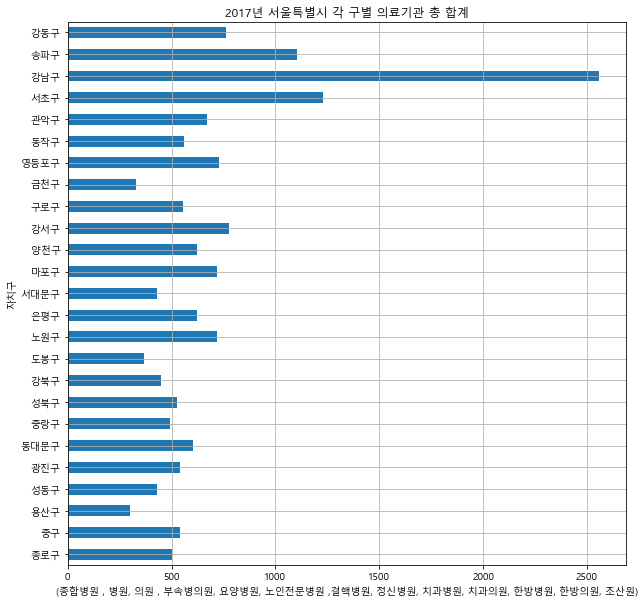

In [68]:
plt.figure(figsize=(10,10)) # 10 -> 720 픽셀
hospital_2017['합계_int'].plot(kind='barh', grid=True)
plt.title('2017년 서울특별시 각 구별 의료기관 총 합계')
plt.xlabel('(종합병원 , 병원, 의원 , 부속병의원, 요양병원, 노인전문병원 ,결핵병원, 정신병원, 치과병원, 치과의원, 한방병원, 한방의원, 조산원)')
plt.show()

In [69]:
hospital_2017['종합병원'].astype(int).head()

자치구
종로구    4
중구     3
용산구    1
성동구    1
광진구    2
Name: 종합병원, dtype: int32

<Figure size 720x720 with 0 Axes>

<AxesSubplot:ylabel='자치구'>

Text(0.5, 1.0, '2017년 서울특별시 각 구별 종합병원 수')

Text(0.5, 0, '종합병원 수')

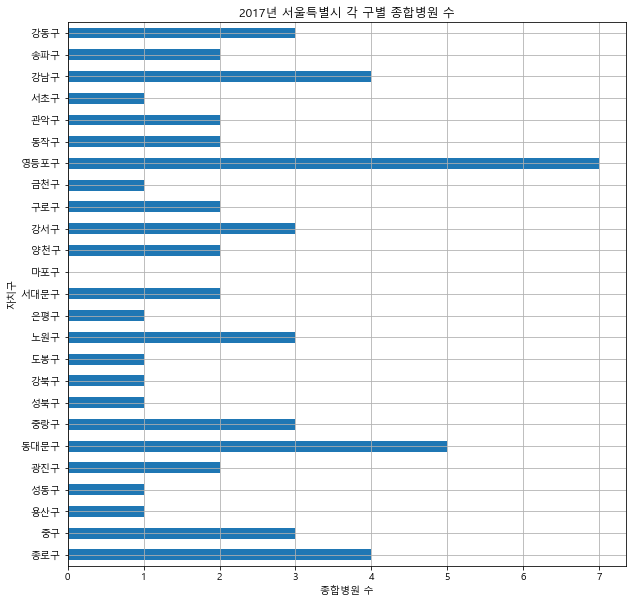

In [70]:
plt.figure(figsize=(10,10)) # 10 -> 720 픽셀
hospital_2017['종합병원'].astype(int).plot(kind='barh', grid=True)
plt.title('2017년 서울특별시 각 구별 종합병원 수')
plt.xlabel('종합병원 수')
plt.show()

<Figure size 720x720 with 0 Axes>

<AxesSubplot:ylabel='자치구'>

Text(0.5, 1.0, '2018년 서울특별시 각 구별 의료기관 총 합계')

Text(0.5, 0, '(종합병원 , 병원, 의원 , 부속병의원, 요양병원, 노인전문병원 ,결핵병원, 정신병원, 치과병원, 치과의원, 한방병원, 한방의원, 조산원)')

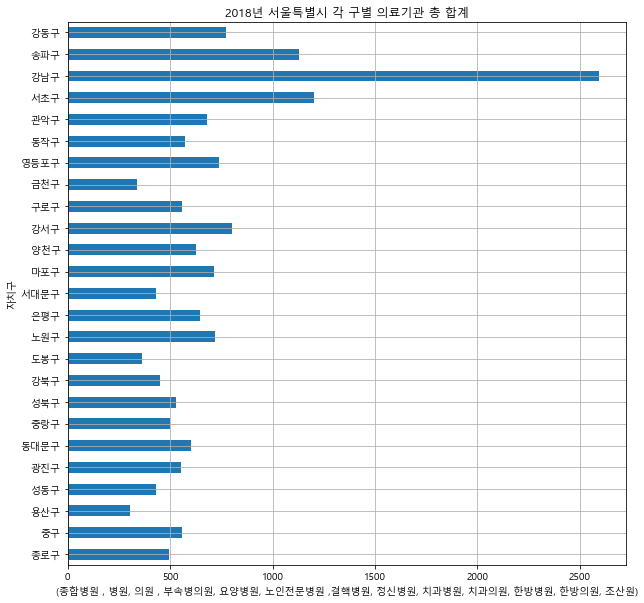

In [71]:
plt.figure(figsize=(10,10)) # 10 -> 720 픽셀
hospital_2018['합계_int'].plot(kind='barh', grid=True)
plt.title('2018년 서울특별시 각 구별 의료기관 총 합계')
plt.xlabel('(종합병원 , 병원, 의원 , 부속병의원, 요양병원, 노인전문병원 ,결핵병원, 정신병원, 치과병원, 치과의원, 한방병원, 한방의원, 조산원)')
plt.show()

<Figure size 720x720 with 0 Axes>

<AxesSubplot:ylabel='자치구'>

Text(0.5, 1.0, '2018년 서울특별시 각 구별 종합병원 수')

Text(0.5, 0, '종합병원 수')

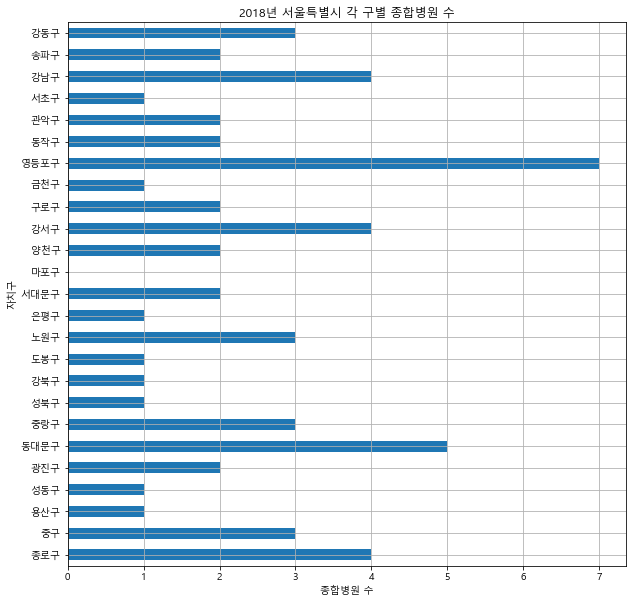

In [72]:
plt.figure(figsize=(10,10)) # 10 -> 720 픽셀
hospital_2018['종합병원'].astype(int).plot(kind='barh', grid=True)
plt.title('2018년 서울특별시 각 구별 종합병원 수')
plt.xlabel('종합병원 수')
plt.show()

<Figure size 720x720 with 0 Axes>

<AxesSubplot:ylabel='자치구'>

Text(0.5, 1.0, '2019년 서울특별시 각 구별 의료기관 총 합계')

Text(0.5, 0, '(종합병원 , 병원, 의원 , 부속병의원, 요양병원, 노인전문병원 ,결핵병원, 정신병원, 치과병원, 치과의원, 한방병원, 한방의원, 조산원)')

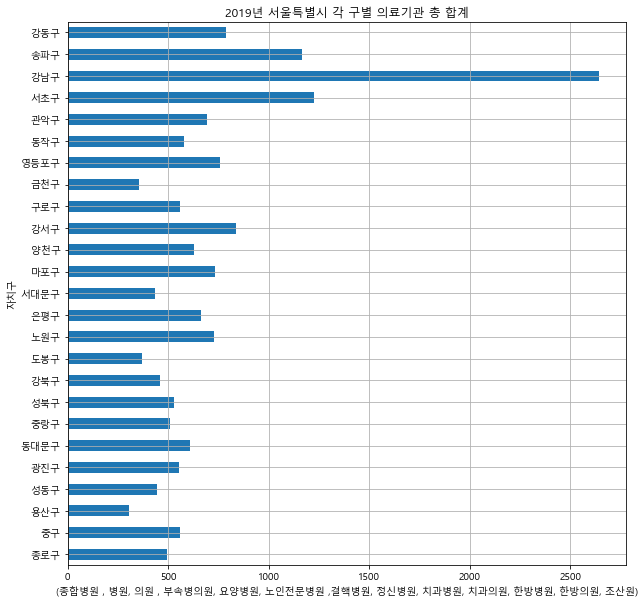

In [73]:
plt.figure(figsize=(10,10)) # 10 -> 720 픽셀
hospital_2019['합계_int'].plot(kind='barh', grid=True)
plt.title('2019년 서울특별시 각 구별 의료기관 총 합계')
plt.xlabel('(종합병원 , 병원, 의원 , 부속병의원, 요양병원, 노인전문병원 ,결핵병원, 정신병원, 치과병원, 치과의원, 한방병원, 한방의원, 조산원)')
plt.show()

<Figure size 720x720 with 0 Axes>

<AxesSubplot:ylabel='자치구'>

Text(0.5, 1.0, '2019년 서울특별시 각 구별 종합병원 수')

Text(0.5, 0, '종합병원 수')

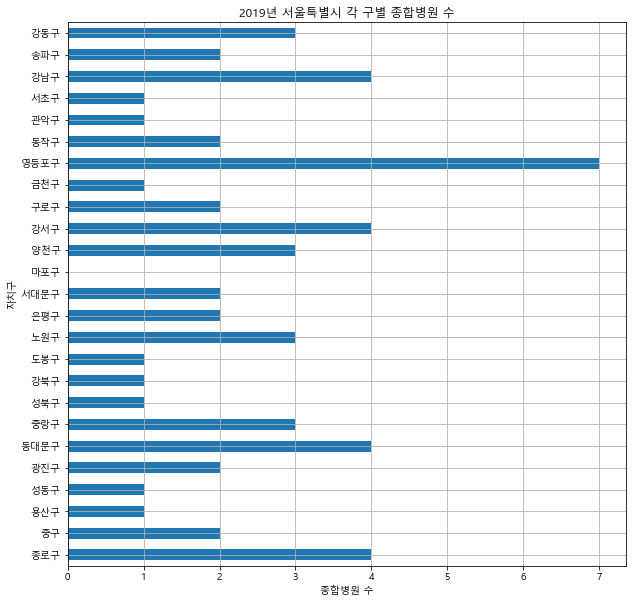

In [74]:
plt.figure(figsize=(10,10)) # 10 -> 720 픽셀
hospital_2019['종합병원'].astype(int).plot(kind='barh', grid=True)
plt.title('2019년 서울특별시 각 구별 종합병원 수')
plt.xlabel('종합병원 수')
plt.show()

<Figure size 720x720 with 0 Axes>

<AxesSubplot:ylabel='자치구'>

Text(0.5, 1.0, '2020년 서울특별시 각 구별 의료기관 총 합계')

Text(0.5, 0, '(종합병원 , 병원, 의원 , 부속병의원, 요양병원, 노인전문병원 ,결핵병원, 정신병원, 치과병원, 치과의원, 한방병원, 한방의원, 조산원)')

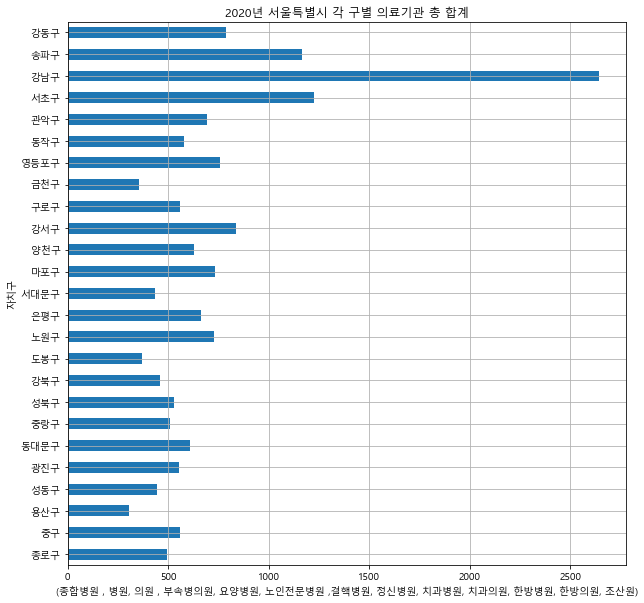

In [75]:
plt.figure(figsize=(10,10)) # 10 -> 720 픽셀
hospital_2020['합계_int'].plot(kind='barh', grid=True)
plt.title('2020년 서울특별시 각 구별 의료기관 총 합계')
plt.xlabel('(종합병원 , 병원, 의원 , 부속병의원, 요양병원, 노인전문병원 ,결핵병원, 정신병원, 치과병원, 치과의원, 한방병원, 한방의원, 조산원)')
plt.show()

<Figure size 720x720 with 0 Axes>

<AxesSubplot:ylabel='자치구'>

Text(0.5, 1.0, '2020년 서울특별시 각 구별 종합병원 수')

Text(0.5, 0, '종합병원 수')

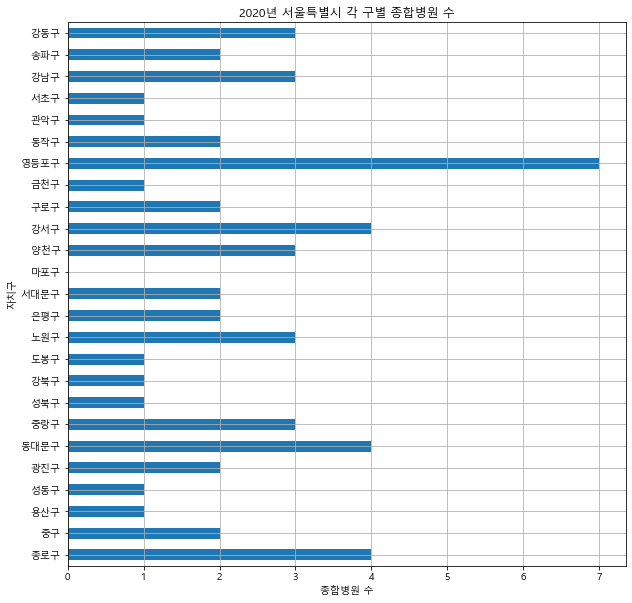

In [76]:
plt.figure(figsize=(10,10)) # 10 -> 720 픽셀
hospital_2020['종합병원'].astype(int).plot(kind='barh', grid=True)
plt.title('2020년 서울특별시 각 구별 종합병원 수')
plt.xlabel('종합병원 수')
plt.show()

### 부동산 데이터와의 결합을 위해 .csv 파일을 만들기 위한 코드


#### 자치구 / 기간  /  합계_int  


#### 자치구 / 기간  / 종합병원 


#### 종합병원을 포함한 이유!!


- 서울특별시 에이치플러스 양지병원 강남세브란스병원
- 강남차병원 강북삼성병원 건국대학교병원 경희대학교병원
- 고려대학교구로병원 고려대학교안암병원 삼성서울병원 서울대학교병원
- 서울성모병원 서울아산병원 세브란스병원 이화여자대학교목동병원
- 이화여자대학교서울병원 중앙대학교병원 한양대학교병원 강남고려병원
- 강남성심병원 강동경희대학교병원 강동성심병원 구로성심병원 국립경찰병원 
- 국립중앙의료원 녹색병원 대림성모병원 대한병원 동부제일병원 동신병원 명지성모병원 미즈메디병원
- 베스티안병원 보라매병원 부민서울병원 삼육서울병원 중앙보훈병원 서울백병원 서울성심병원 서울의료원

- 대형병원 덕에 값 뛰는 아파트 (https://www.mk.co.kr/news/realestate/view/2016/04/287918/)
- 대학병원 예정지 아파트 값 '요동' "유치 혈안 이유있네" (http://m.medipana.com/index_sub.asp?NewsNum=282111)
- 대형병원 등 ‘의(醫)세권’ 부동산…몸값 상승세 ‘뚜렷 (https://www.paxetv.com/news/articleView.html?idxno=106837)

In [77]:
### 서울특별시 각 구별 종합병원 목록 크롤링
### https://ko.wikipedia.org/wiki/%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD%EC%9D%98_%EB%B3%91%EC%9B%90_%EB%AA%A9%EB%A1%9D 

In [78]:
hospital_2017 = hospital_2017.reset_index()
hospital_2018 = hospital_2018.reset_index()
hospital_2019 = hospital_2019.reset_index()
hospital_2020 = hospital_2020.reset_index()

In [79]:
hospital_fin_2017 = hospital_2017.loc[:,['기간','자치구','합계_int','종합병원']]
hospital_fin_2017.sort_values(by="자치구", ascending=True, inplace=True)
hospital_fin_2017.reset_index(drop=True,inplace=True)
hospital_fin_2017.rename(columns={'합계_int' : '의료기관_총_합계',}, inplace=True)

In [80]:
hospital_fin_2018 = hospital_2017.loc[:,['기간','자치구','합계_int','종합병원']]
hospital_fin_2018.sort_values(by="자치구", ascending=True, inplace=True)
hospital_fin_2018.reset_index(drop=True,inplace=True)
hospital_fin_2018.rename(columns={'합계_int' : '의료기관_총_합계',}, inplace=True)

In [81]:
hospital_fin_2019 = hospital_2017.loc[:,['기간','자치구','합계_int','종합병원']]
hospital_fin_2019.sort_values(by="자치구", ascending=True, inplace=True)
hospital_fin_2019.reset_index(drop=True,inplace=True)
hospital_fin_2019.rename(columns={'합계_int' : '의료기관_총_합계',}, inplace=True)

In [82]:
hospital_fin_2020 = hospital_2017.loc[:,['기간','자치구','합계_int','종합병원']]
hospital_fin_2020.sort_values(by="자치구", ascending=True, inplace=True)
hospital_fin_2020.reset_index(drop=True,inplace=True)
hospital_fin_2020.rename(columns={'합계_int' : '의료기관_총_합계',}, inplace=True)

In [83]:
hospital_fin_2017.head(2)
hospital_fin_2018.head(2)
hospital_fin_2019.head(2)
hospital_fin_2020.head(2)

,기간,자치구,의료기관_총_합계,종합병원
0,2017,강남구,2559,4
1,2017,강동구,761,3


,기간,자치구,의료기관_총_합계,종합병원
0,2017,강남구,2559,4
1,2017,강동구,761,3


,기간,자치구,의료기관_총_합계,종합병원
0,2017,강남구,2559,4
1,2017,강동구,761,3


,기간,자치구,의료기관_총_합계,종합병원
0,2017,강남구,2559,4
1,2017,강동구,761,3


### 부동산 데이터와의 결합을 위해 .csv 파일을 만들기 위한 코드
### 자치구 / 기간 / 의료기관_총_합계 / 종합병원 -> 4개의 열을 갖고옴 (종합병원은 집값과의 상관관계가 높아서 포함)

In [84]:
hospital_fin_2017.to_csv("./fin_data/서울시_의료기관_구_별_합계(2017)_최종_종합병원_수_포함.csv", index = False)
hospital_fin_2018.to_csv("./fin_data/서울시_의료기관_구_별_합계(2018)_최종_종합병원_수_포함.csv", index = False)
hospital_fin_2019.to_csv("./fin_data/서울시_의료기관_구_별_합계(2019)_최종_종합병원_수_포함.csv", index = False)
hospital_fin_2020.to_csv("./fin_data/서울시_의료기관_구_별_합계(2020)_최종_종합병원_수_포함.csv", index = False)